# Mushroom classification

The dataset consists of mushrooms described by features related to physical characteristics such as the cap, gill or stalk.
Each instance of mushroom is identified as edible (e) or poisonous (p).
The study is about classification of mushrooms as edigible or poisonous.
The classification is performed by Logistic regression and others models comparison is conducted.

The outline is as follows:
* 1) Exploratory Data Analysis
* 2) Data Processing
* 3) Classification by Logistic Regression
* 4) Models comparison with Cross-validation 
* 5) Conclusion


![](mush.jpeg)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# other models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
# plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import seaborn as sns
from seaborn import axes_style
from seaborn import countplot
from IPython.display import display

# 1) Exploratory Data Analysis

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The dataset consists of 8124 instances of 23 columns:
* 22 features describing a mushroom.
* class: label identifying whether the mushroom is edible or poisonous. 

The class column stands for the target variable.

Features values are encoded by characters. 
For example, gill-size is either broad (b) or narrow (n). 

In [3]:
for col in data.columns.values:
    print(col, data[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


The veil-type feature has only a unique value p. 
Such a feature is irrelevant and provides no information for classification.<br>
We proceed removing features with single value.

In [4]:
for col in data.columns.values:
    if len(data[col].unique()) <= 1:
        print("Removing column {}, which only contains the value: {}"
              .format(col, data[col].unique()[0]))

Removing column veil-type, which only contains the value: p


## 1.1) Features distribution

Let represent the distribution of some features:

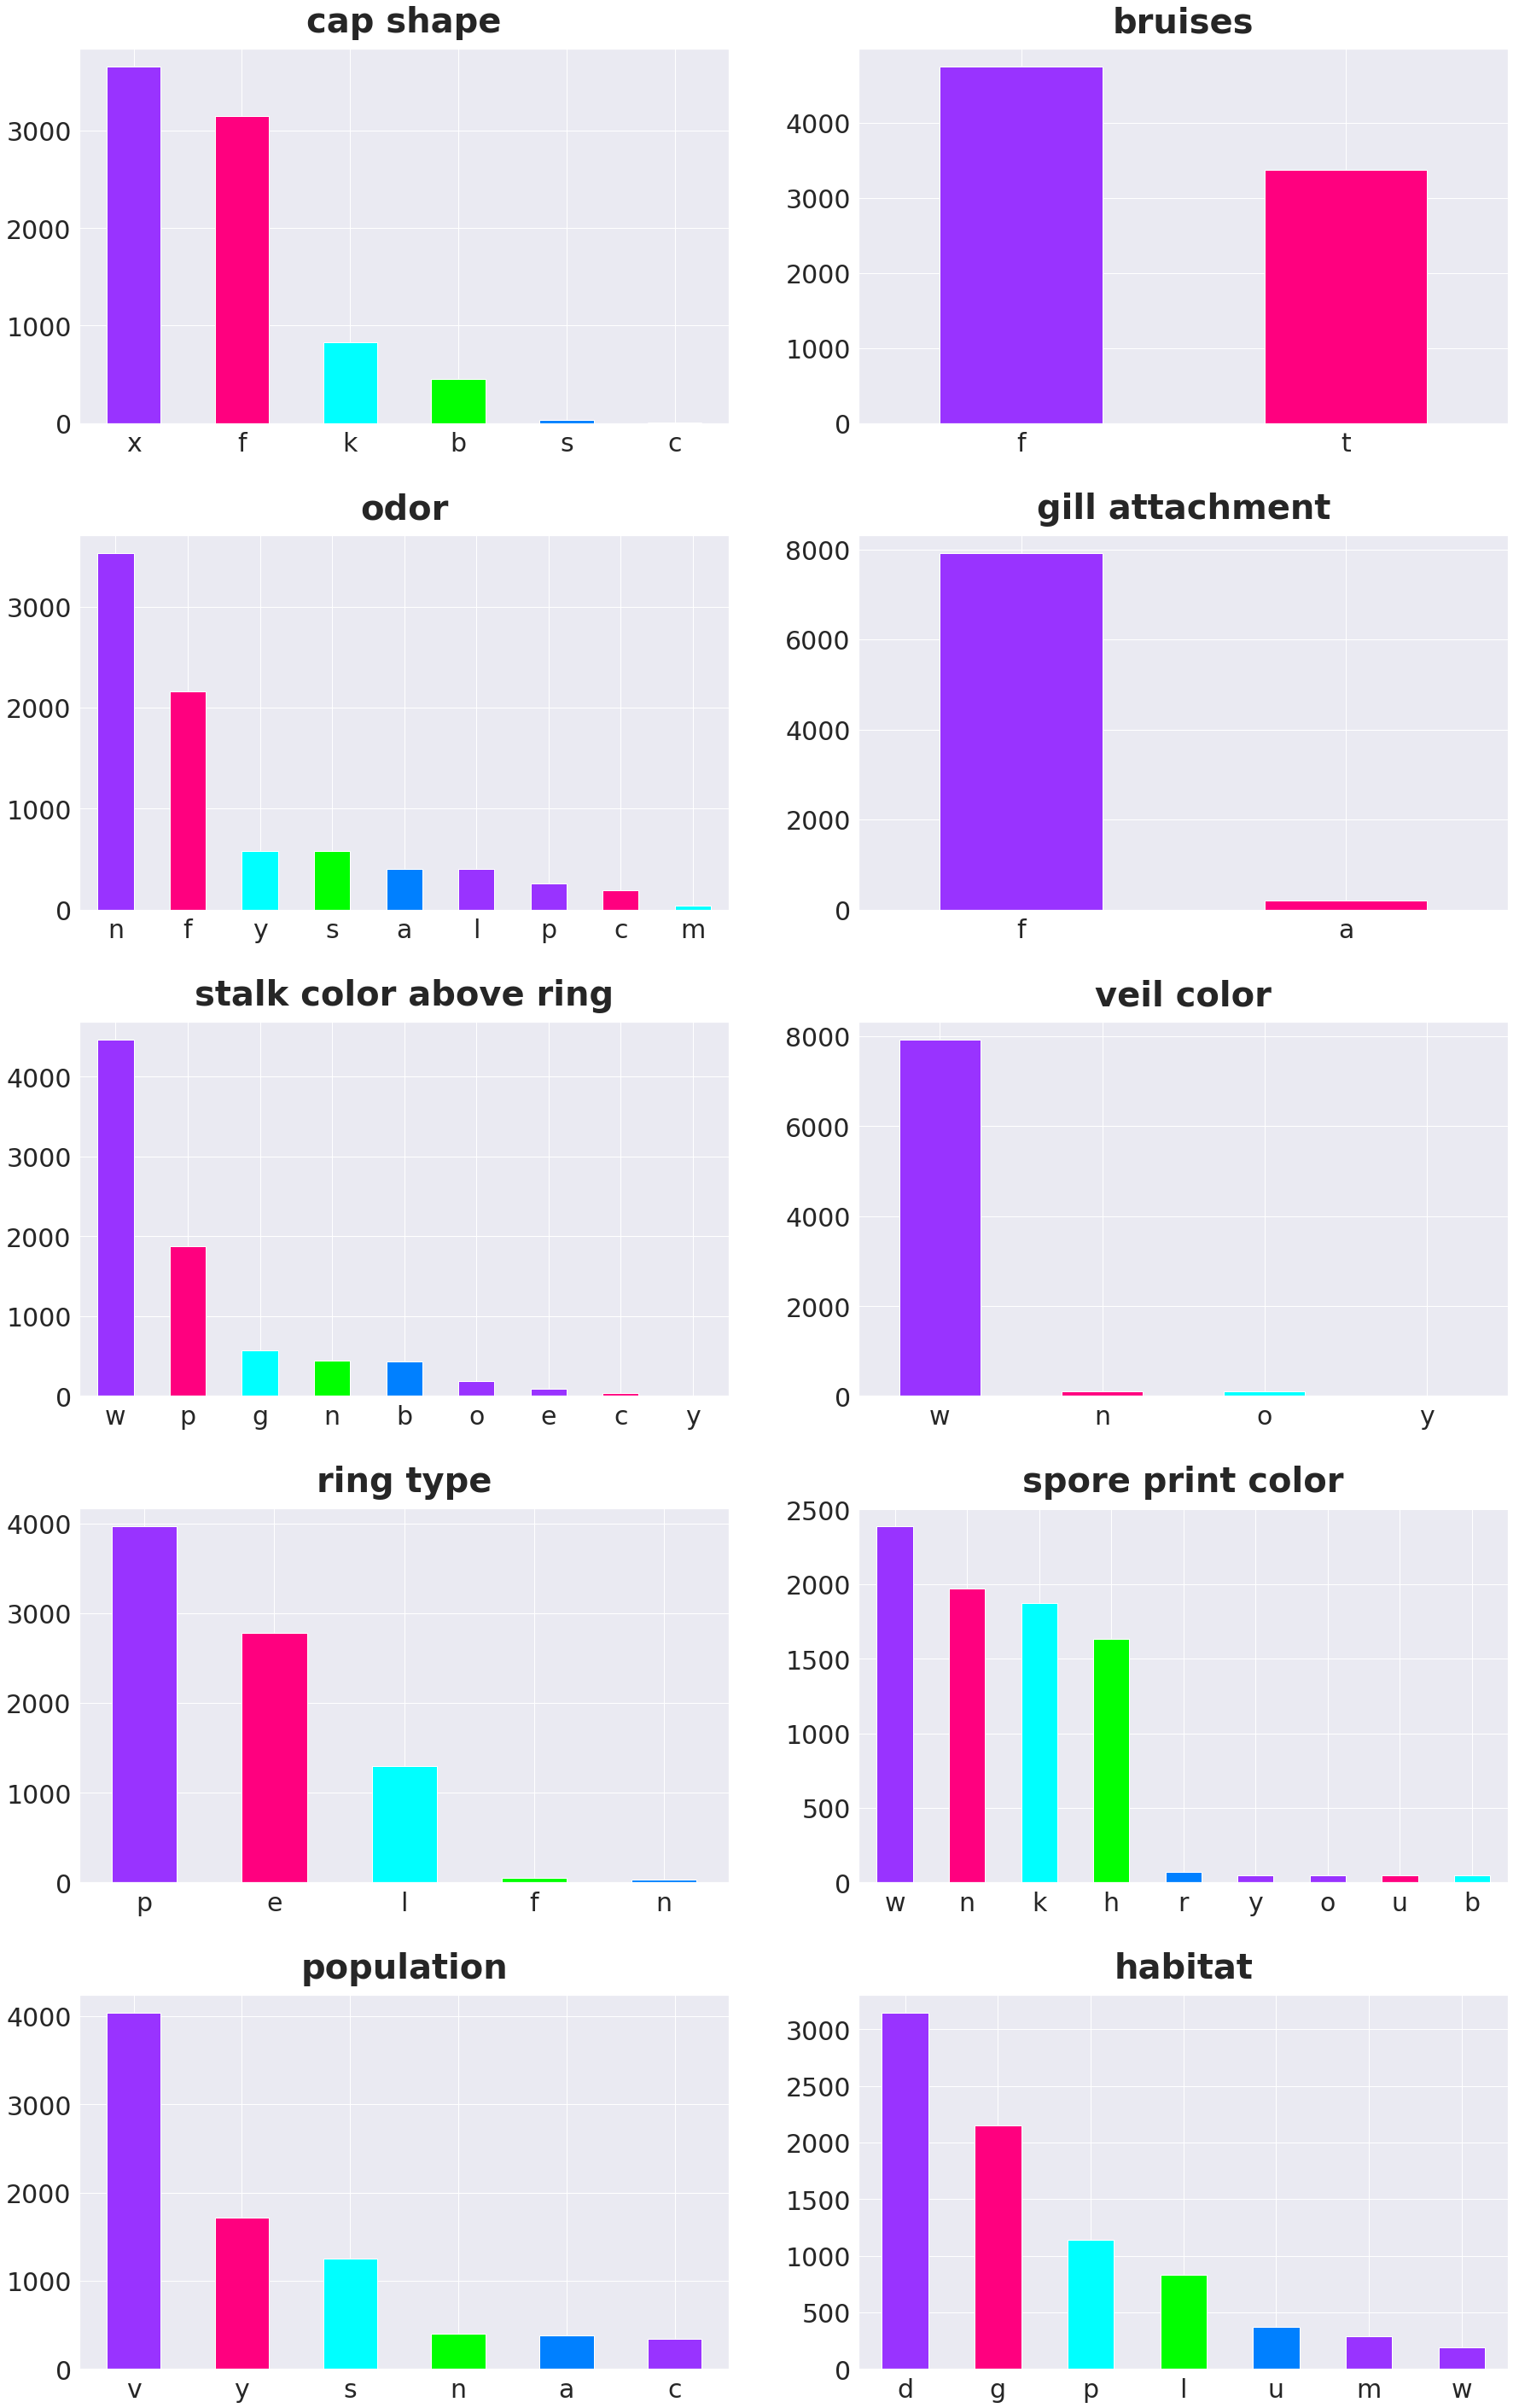

In [5]:
def graph_plot(name, u):
    data[name].value_counts().plot(kind="bar",ax=u, color=colors)    
    plt.setp(u.get_xticklabels(), rotation=0)
    u.set_title(name.replace("-"," "),
                fontsize=40,
                fontdict={"fontweight": "bold"},
                pad=20)
    u.tick_params(axis="x", labelsize=30)
    u.tick_params(axis="y", labelsize=30)
            
sns.set()
fig, ax = plt.subplots(5,2, 
                       figsize=(30, 50), 
                       gridspec_kw={"wspace" : 0.2, "hspace" : 0.3})
colors=["#9933ff","#ff007f","#00ffff","#00ff00","#0080ff"]
plt.rcParams['axes.axisbelow'] = True
graph_plot("cap-shape",ax[0,0])
graph_plot("bruises",ax[0,1])
graph_plot("odor",ax[1,0])
graph_plot("gill-attachment",ax[1,1])
graph_plot("stalk-color-above-ring",ax[2,0])
graph_plot("veil-color",ax[2,1])
graph_plot("ring-type",ax[3,0])
graph_plot("spore-print-color",ax[3,1])
graph_plot("population",ax[4,0])
graph_plot("habitat",ax[4,1])

## 1.2) Edigible/poisonous distribution

We consider the two classes (e/p) distribution and check if the data our balanced. 
Ideally, in the context of classification, the best configuration is an equal number of instances for each class.

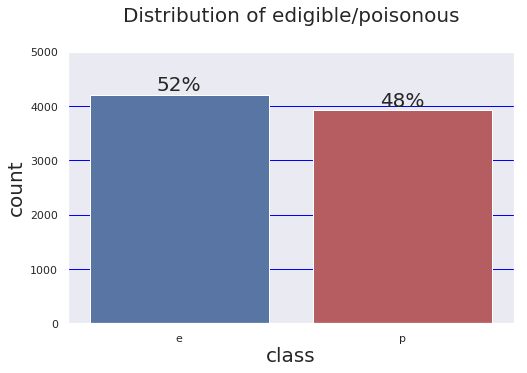

In [6]:
rc={'axes.labelsize': 20, 'font.size': 20, 'legend.fontsize': 20, 'axes.titlesize': 20}
sns.set(rc=rc)

order = data['class'].value_counts(ascending=False).index
with axes_style({'grid.color': "blue"}):
    fig = figure(figsize=(8,5))
    ax = countplot(data=data,x=data['class'],
                   order=order,
                   palette=["C0","r"])
    plt.title('Distribution of edigible/poisonous', pad=30)
    plt.ylim([0,5000])
    e = data['class'].value_counts()[0]
    p = data['class'].value_counts()[1]
    tot = e+p
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}%'.format(100.*y/tot), (x.mean(),y),ha='center', va='bottom')       
show()

We notice that there is an almost equal number of edigible and poisonous mushrooms.<br>
Thus, the data set is fairly well balanced.

## 1.3) Focus on the odor

In this section we focus on the odor feature.
Indeed, according to others studies the mushroom's odor is a predominant factor in determining whether it's edible or poisonous.

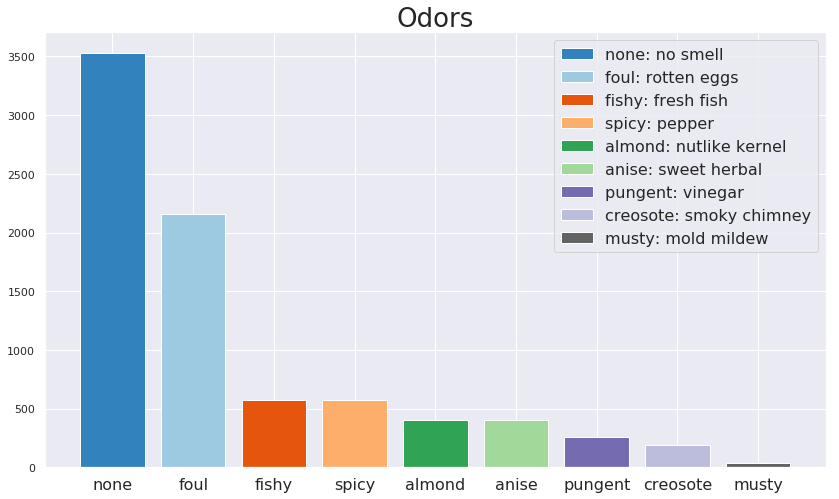

In [7]:
odors = data['odor'].value_counts()
height = odors.values.tolist()
len_odor = np.arange(len(odors))
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(9)*2)

fig, ax = plt.subplots(figsize=(14,8))
odor_bars = ax.bar(len_odor, height, 0.8, color=outer_colors)#=colors)
ax.set_title('Odors',fontsize=26)
ax.set_xticks(len_odor) 
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 16)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish',
                      'spicy: pepper','almond: nutlike kernel', 'anise: sweet herbal', 
                      'pungent: vinegar','creosote: smoky chimney', 'musty: mold mildew'], 
          fontsize = 16)       
show()

### How good mushrooms smell could discriminate between edible and poisonous mushrooms?

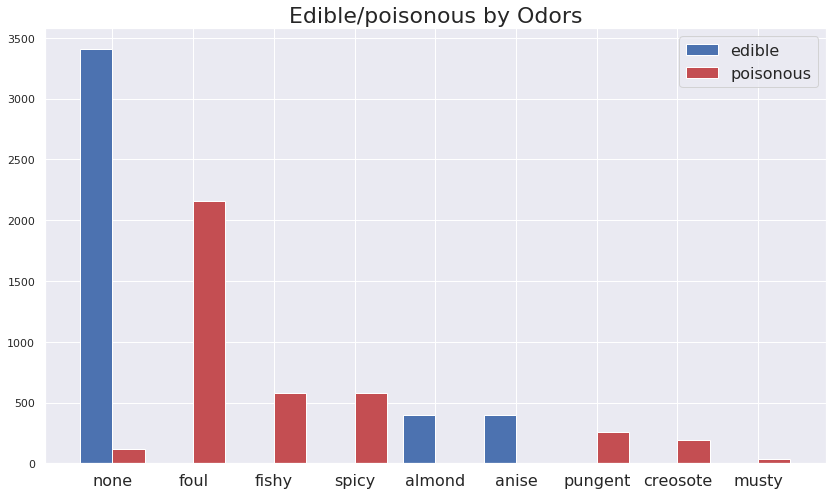

In [8]:
p_od = [] 
e_od = []    
odor_label = odors.axes[0].tolist()
for o in odor_label:
    length = len(data[data['odor'] == o].index)
    edibles = len(data[(data['odor'] == o) & (data['class'] == 'e')].index)
    e_od.append(edibles)
    p_od.append(length-edibles)

width = 0.4
fig, ax = plt.subplots(figsize=(14,8))
e_bars = ax.bar(len_odor, e_od , width)
p_bars = ax.bar(len_odor+width, p_od , width, color='r')
ax.set_title('Edible/poisonous by Odors',fontsize=22)
ax.set_xticks(len_odor+width/2) 
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 16)
ax.legend((e_bars,p_bars),('edible','poisonous'),fontsize = 16)
show()

The histogram depicts that all odors, except none, are exclusive of edible and poisonous mushrooms.
Thus, odor features are able to discriminate perfectly between edible and poisonous mushrooms. 
Besides, we observe that the 6 kinds of odors characteristic of poisonous mushrooms are: foul, fishy, spicy, pungent, creosote and musty.
Thus, it seems like unpleasant and strong odors correspond to poisonous mushrooms.
Consequently, this results suggest that we should be careful of smelly mushrooms!

Moreover, as no smell mushrooms could be poisonnous, others features apart from odor might be taken into account in order to classify the data.

# 2) Data processing

## 2.1) Separating features from class

The features are put in the X variable and the labels (e)ligible and (p)oisonous are put in the y variable.

In [9]:
X = data.drop(["class"], axis=1)
y = data["class"]
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

## 2.2) Encoding

In the Mushroom database, the features are nominal categorical variables with no intrinsic order.
However, most Machine Learning models expect the features to be numerical variables. 
Thus, the data have to be encoded, i.e. to be converted to numerical values, for classification.
To achieve this, a typical approach is to perform Label Encoding. 
It consists in assigning a number to each category.

In [10]:
# label encoding on the class
le = LabelEncoder()
y = le.fit_transform(y)

The strategy is relevant when the features are binary or ordinal categorical (ordered). 
However, in the Mushroom database, none of the features are ordinal categorical.
In this case, the strategy is One-hot encoding: each category of feature is converted into binary feature.
The drawback of One-hot encoding is that it introduces additional columns to the data set. 

In [11]:
# one-hot encoding for features
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


* y = 0 : the mushroom is edible.
* y = 1 : the mushroom is poisonous.

=> classifier as edigible or poisonous: target gets 0 or 1.

## 2.3) Standardising 

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 2.4) train/test splitting

In [13]:
"""
  * stratify:
      same ratio of edible/poisonous within both train and test sets
   
  * random: 
      data set is split identically every time the code is run
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=2)

# 3) Classification by Logistic regression

The logistic regression is a statistical model thats adopts a logistic function to model a binary variable.
The logistic regression is well suited for classification, it predicts the probability for an instance to belong to a class.

## 3.1) Default Logistic Regression

In [14]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
# default parameter: L2-reg, lambda=1
y_pred = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
print ("Accuracy of Logistic Regression is %f" % acc_lr)

Accuracy of Logistic Regression is 1.000000


The logistic regression model achieves perfect accuracy.

However in the context of classification problem, the accuracy can be somehow irrelevant errors metrics to assess the performance of a model.
Instead, the sensitivity (proportions of actual positives correctly identified) and specifity (proportion of actual negatives correctly identified) yield more information.
Therefore, below we represent the ROC curve and the confusion matrix to assess the performance.

### Roc curve

The ROC curve (receiver operating characteristic) depicts the false positive rate with respect to the true positive rate according to a threshold.
The classification is determined by whether or not the probability is greater/less than the threshold.

Then, the classifier's performance is represented by the area under the ROC curve (AUC), ideally it should be close to 1.

In [15]:
y_prob = lr.predict_proba(X_test)[:,1] 
# threshold for prediction
y_pred = np.where(y_prob > 0.5, 1, 0) 

[fpr, tpr, thr] = metrics.roc_curve(y_test, y_prob)
"""
fpr = false positive rate 
tpr = true positive rate 
thr = threshold 
"""
roc_auc = auc(fpr, tpr)
print("Accuracy of Logistic Regression is %0.4f" % roc_auc)

Accuracy of Logistic Regression is 1.0000


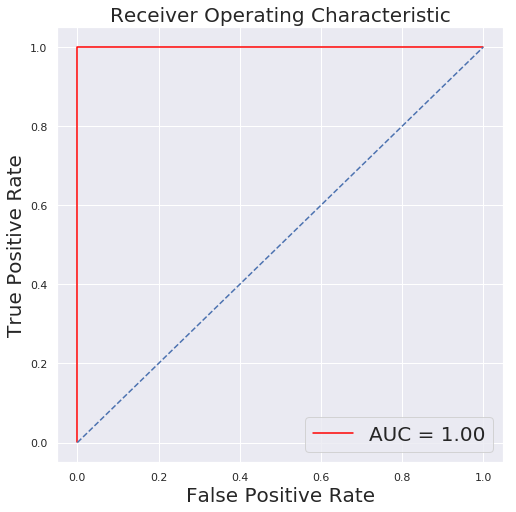

In [16]:
# on affiche le taux de FAUX positifs en fonction de VRAIS positifs
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

It seems like the logistic regression achieved the maximum accuracy possible: 100%.<br>
Thus, it can be stated that the given features are good indicators for mushrooms edibility.

### Confusion matrix

Text(0.5,1,'Confusion Matrix')

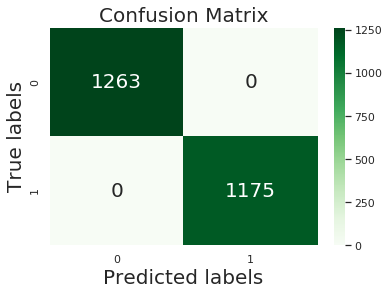

In [17]:
results = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(results, cmap="Greens", annot=True, fmt='d', ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

As expected false positive and false negative rates are 0, meaning that all mushrooms were correctly classified.

The classifier is perfect! 

## 3.2) Grid Search on Logistic Regression

Herein, the Logistic regression is run applying [Cross-validation](https://github.com/christelle-git/Cross-validation/) with a grid search implemented by [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
Doing so, the parameters are optimized by cross-validated grid-search over a parameter grid.
The Cross-validation splits data into training/test k-folds, the splitting parameter is set to 10 k-folds so that over-fitting may occurs.

The parameters grid specifies the regularization parameters l2 (Ridge regression) and l1 (Lasso) which prevent over-fitting by shrinking coefficients.
The regression and Lasso are presented and compared in repository [prostate-cancer-prediction](https://github.com/christelle-git/prostate-cancer-prediction/).
Then a grid search is performed on each training fold to tune the optimal hyperparameter.
As the GridSearchCV can be computationally expensive, the option n_jobs=-1 allows to parallelize the operations across all CPU cores.

In [18]:
# parameters grid:
params = {'C': np.logspace(-3, 3, 10) , 'penalty':['l1','l2'] }
"""
    cv: cross-validation splitting -> number of folds
    scoring: metrics for evaluating prediction
"""
nb_fold = 10
lr_gs = GridSearchCV(lr, params, cv=nb_fold, n_jobs=-1, scoring='accuracy')
lr_gs.fit(X_train, y_train)
print(lr_gs.best_params_)

score = lr_gs.score(X_test, y_pred)
print("GridSearchCV score: ", score)

{'C': 0.46415888336127775, 'penalty': 'l2'}
GridSearchCV score:  1.0


The logistic regression model achieves perfect accuracy.
This concludes that the model is performing well without over-fitting the data. 
Moreover, it indicates that the relationship between the features and the target variable is highly linear.

# 4) Model comparison with Cross-validation

Let investigate the performance of other models.
We adopt a [Cross-validation](https://github.com/christelle-git/Cross-validation/) for differents Machine Learning models and report results.

In [19]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LSVC', LinearSVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC(probability=True)))
models.append(('RF', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('NN', MLPClassifier(alpha = 1)))      

list_name = ["Logistic Regression","Linear SVC","Nearest Neighbors",
            "Decision Tree", "Support Vector Classification", "Random Forest",
             "LinearDiscriminantAnalysis", "QuadraticDiscriminantAnalysis",
            "Neural Net"]
df = pd.DataFrame(data=np.zeros(shape=(len(list_name),2)),
                 columns = ['classifier', 'mean accuracy'])

seed = 1
i = 0
model_name = []
model_score = []
# evaluate each model in turn
print("Training...")
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, 
                                 n_jobs=-1,
                                 scoring='accuracy')    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model_name.append(name)
    model_score.append(cv_results.mean())
    
    df.loc[i, 'classifier'] = list_name[i]
    df.loc[i, 'mean accuracy'] = cv_results.mean()
    i = i + 1
    
display(df)  

Training...
LR: 1.000000 (0.000000)
LSVC: 1.000000 (0.000000)
KNN: 0.999472 (0.000806)
DT: 1.000000 (0.000000)
SVC: 0.999648 (0.000704)
RF: 1.000000 (0.000000)
LDA: 0.999296 (0.000862)
QDA: 1.000000 (0.000000)
NN: 0.999824 (0.000527)


,classifier,mean accuracy
0,Logistic Regression,1.000000
1,Linear SVC,1.000000
2,Nearest Neighbors,0.999472
3,Decision Tree,1.000000
4,Support Vector Classification,0.999648
5,Random Forest,1.000000
6,LinearDiscriminantAnalysis,0.999296
7,QuadraticDiscriminantAnalysis,1.000000
8,Neural Net,0.999824


Text(0,0.5,'Accuracy score')

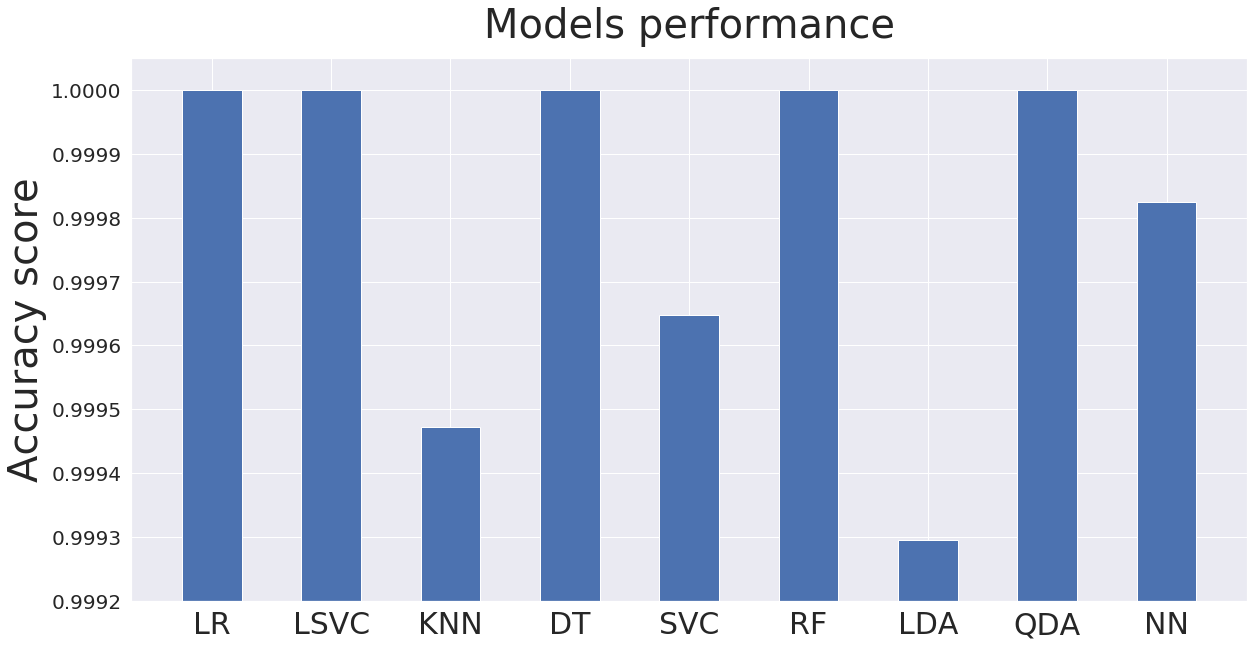

In [20]:
plt.figure(figsize=(20,10))
plt.ylim([0.9992,1.00005])
plt.bar(model_name,model_score, width=0.5)
plt.title("Models performance", fontsize=40, pad=20)
plt.tick_params(axis="x", labelsize=30)
plt.tick_params(axis="y", labelsize=20)
plt.ylabel('Accuracy score', fontsize=40)

Very high accuracy is achieved, with perfect accuracy for most models. 
The worst performance is obtained by Linear Discriminant Analysis and k-NN.

# 5) Conclusion

We obtain very high accuracy for classifying the edigible and poisonous mushrooms, by applying various Machine Learning models.
With the metrics considered herein, most models achieve the perfect accuracy.

Moreover, we observe that the Logistic regression yields remarkably high scores.  
It could mean that the dataset is almost-linearly separable.

Besides, as this dataset has a relatively small number of samples and features (8124, 22), one should pay attention that considering a bigger dataset could lead to different result.